In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

In [3]:
sp500 = yf.Ticker("^GSPC")

In [4]:
sp500 = sp500.history(period = "max")

sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [5]:
sp500.shape

(24253, 7)

In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-07-08 00:00:00-04:00', '2024-07-09 00:00:00-04:00',
               '2024-07-10 00:00:00-04:00', '2024-07-11 00:00:00-04:00',
               '2024-07-12 00:00:00-04:00', '2024-07-15 00:00:00-04:00',
               '2024-07-16 00:00:00-04:00', '2024-07-17 00:00:00-04:00',
               '2024-07-18 00:00:00-04:00', '2024-07-19 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24253, freq=None)

Text(0.5, 1.0, 'S&P500 Price History')

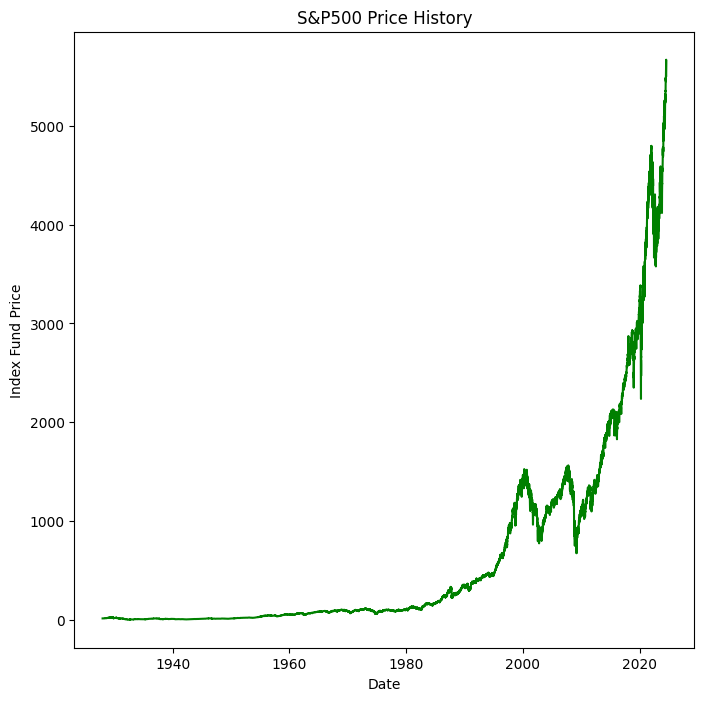

In [7]:
fig, ax = plt.subplots(figsize = (8, 8))

ax.plot(sp500.index.date, sp500['Close'], color="green")
ax.set_xlabel("Date")
ax.set_ylabel("Index Fund Price")
ax.set_title("S&P500 Price History")

We can see it start from 1927 and goes to current day(2024).

but since old data will be very irrelevant when it comes to decision making, and will only serve as noise when training the machine learning model, we will remove the old data.

In [8]:
sp500 = sp500.loc["1995-01-01 00:00:00-05:00":].copy()

sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000,0.0,0.0
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000,0.0,0.0
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000,0.0,0.0
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000,0.0,0.0
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-15 00:00:00-04:00,5638.160156,5666.939941,5614.750000,5631.220215,3620470000,0.0,0.0
2024-07-16 00:00:00-04:00,5644.089844,5669.669922,5639.020020,5667.200195,4041760000,0.0,0.0
2024-07-17 00:00:00-04:00,5610.069824,5622.490234,5584.810059,5588.270020,4246450000,0.0,0.0


In [9]:
sp500.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [10]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000,0.0,0.0
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000,0.0,0.0
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000,0.0,0.0
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000,0.0,0.0
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000,0.0,0.0


In [11]:
sp500 = sp500.drop(columns = ['Dividends', 'Stock Splits'])

sp500

,Open,High,Low,Close,Volume
Date,,,,,
1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000
...,...,...,...,...,...
2024-07-15 00:00:00-04:00,5638.160156,5666.939941,5614.750000,5631.220215,3620470000
2024-07-16 00:00:00-04:00,5644.089844,5669.669922,5639.020020,5667.200195,4041760000
2024-07-17 00:00:00-04:00,5610.069824,5622.490234,5584.810059,5588.270020,4246450000


Text(0.5, 1.0, 'S&P500 Price History')

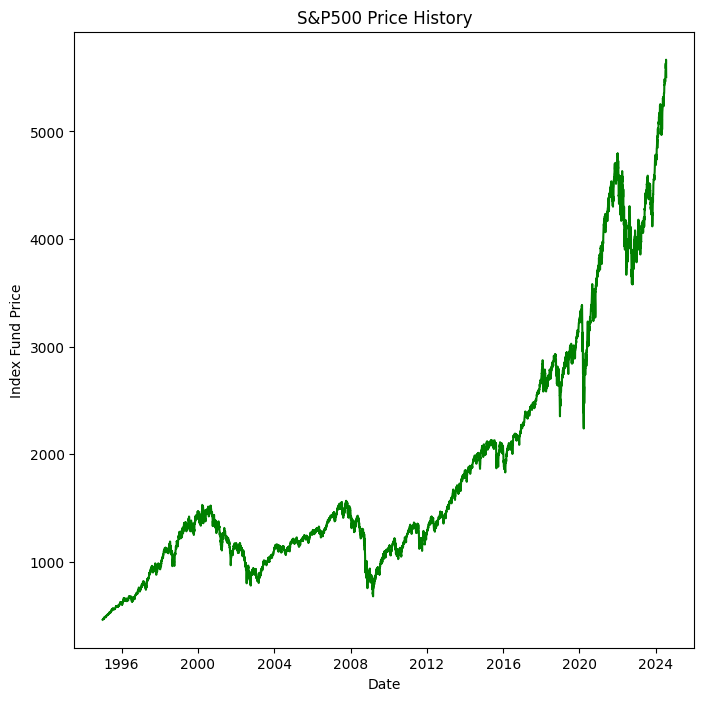

In [12]:
fig, ax = plt.subplots(figsize = (8, 8))

ax.plot(sp500.index.date, sp500['Close'], color="green")
ax.set_xlabel("Date")
ax.set_ylabel("Index Fund Price")
ax.set_title("S&P500 Price History")

In [13]:
sp500['Tomorrow'] = sp500['Close'].shift(-1)

sp500.head(20)

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000,460.709991
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000,460.339996
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000,460.679993
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000,460.829987
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000,461.679993
1995-01-10 00:00:00-05:00,460.899994,464.589996,460.899994,461.679993,352450000,461.660004
1995-01-11 00:00:00-05:00,461.679993,463.609985,458.649994,461.660004,346310000,461.640015
1995-01-12 00:00:00-05:00,461.640015,461.929993,460.630005,461.640015,313040000,465.970001
1995-01-13 00:00:00-05:00,461.640015,466.429993,461.640015,465.970001,336740000,469.380005


In [14]:
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

In [15]:
sp500.tail()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2024-07-15 00:00:00-04:00,5638.160156,5666.939941,5614.750000,5631.220215,3620470000,5667.200195,1
2024-07-16 00:00:00-04:00,5644.089844,5669.669922,5639.020020,5667.200195,4041760000,5588.270020,0
2024-07-17 00:00:00-04:00,5610.069824,5622.490234,5584.810059,5588.270020,4246450000,5544.589844,0
2024-07-18 00:00:00-04:00,5608.560059,5614.049805,5522.810059,5544.589844,4007510000,5505.000000,0
2024-07-19 00:00:00-04:00,5543.370117,5557.500000,5497.040039,5505.000000,3760570000,NaN,0


In [16]:
sp500 = sp500.dropna()

In [17]:
sp500.tail()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2024-07-12 00:00:00-04:00,5590.759766,5655.560059,5590.439941,5615.350098,3700280000,5631.220215,1
2024-07-15 00:00:00-04:00,5638.160156,5666.939941,5614.750000,5631.220215,3620470000,5667.200195,1
2024-07-16 00:00:00-04:00,5644.089844,5669.669922,5639.020020,5667.200195,4041760000,5588.270020,0
2024-07-17 00:00:00-04:00,5610.069824,5622.490234,5584.810059,5588.270020,4246450000,5544.589844,0
2024-07-18 00:00:00-04:00,5608.560059,5614.049805,5522.810059,5544.589844,4007510000,5505.000000,0


In [18]:
x = sp500[['Open', 'High', 'Low',	'Close', 'Volume']].values
y = sp500['Target'].values

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=48)
clf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, random_state=0)

clf.fit(X_test, y_test)

RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=0)

In [20]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

predictions = clf.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(f1_score(y_test, predictions))

[[206 307]
 [ 61 542]]
0.6702508960573477
0.7465564738292011


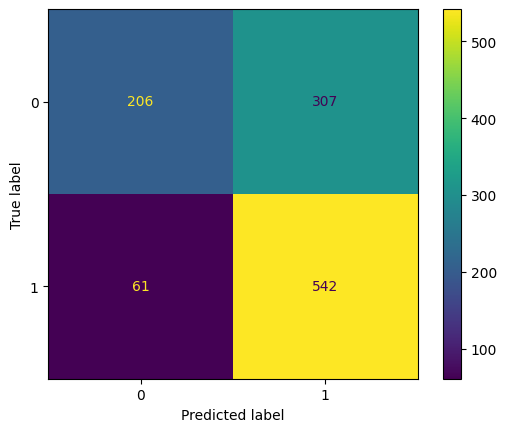

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

cm=confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [22]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-Validation Accuracy Scores:", cross_val_scores)
print("Mean CV Accuracy:", np.mean(cross_val_scores))

Cross-Validation Accuracy Scores: [0.53359684 0.53639241 0.53243671 0.54272152 0.53006329]
Mean CV Accuracy: 0.5350421523990594


Graph to visualize the predictions and how often they are right.

Text(0.5, 1.0, 'Actual VS. Predicted Values')

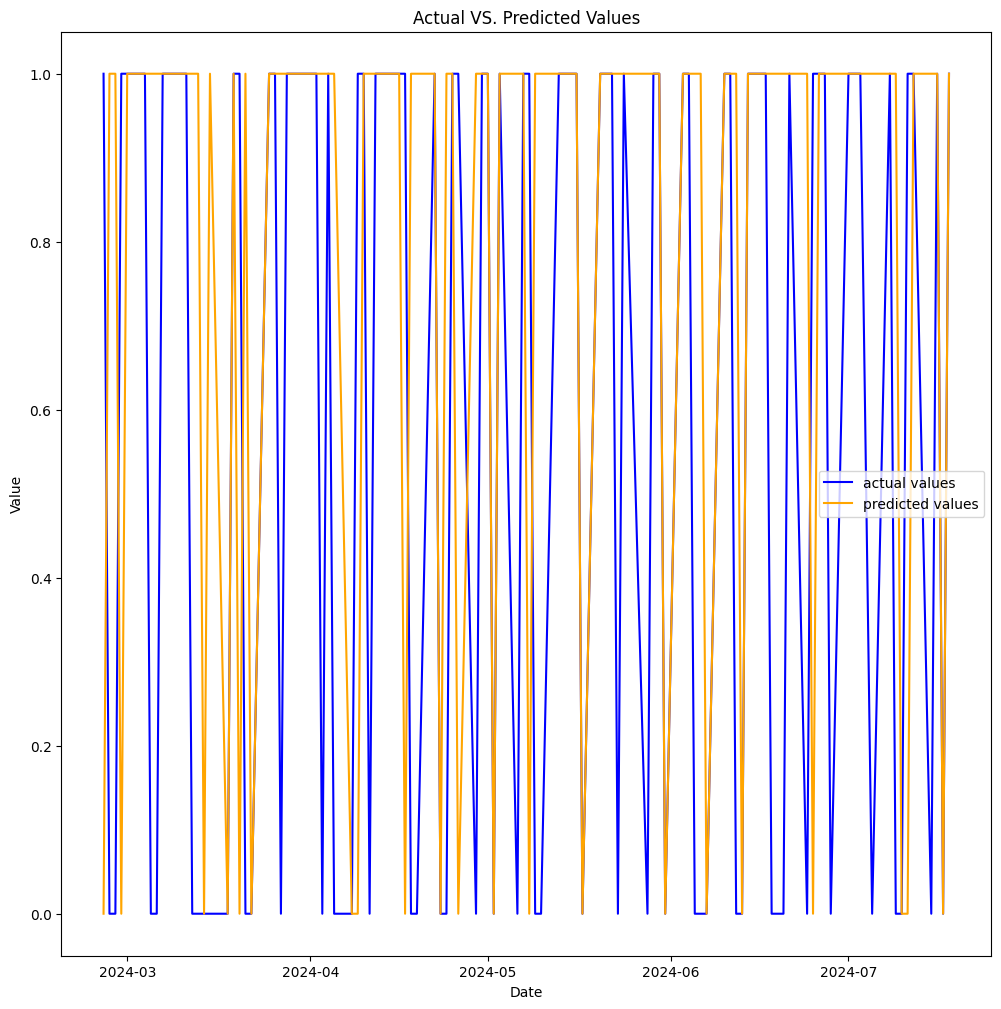

In [23]:
fig, ax = plt.subplots(figsize = (12, 12))

ax.plot(sp500[-100:].index.date, y_test[-100:], color="blue", label="actual values")
ax.plot(sp500[-100:].index.date, predictions[-100:], color="orange", label="predicted values")
ax.legend()

ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.set_title("Actual VS. Predicted Values")

In [24]:
preds = pd.Series(predictions)

preds.value_counts()

1    849
0    267
Name: count, dtype: int64

In [25]:
test = pd.Series(y_test)

test.value_counts()

1    603
0    513
Name: count, dtype: int64

In [26]:
print(accuracy_score(y_test, predictions))

0.6702508960573477


Our accuracy is decent, but we will try to improve it by utilizing feature engineering techniques.

For instance, we will compare the close value for a date with a rolling average of dates close to it. eg. 10, 20, 40.

We will also find the trend of the dates closest to the specific date. This will provide insight on the price changes leading up to that specific date.

In [27]:
sp500['rolling_mean_10'] = sp500['Close'].rolling(window=10).mean()
sp500['rolling_mean_20'] = sp500['Close'].rolling(window=20).mean()
sp500['rolling_mean_40'] = sp500['Close'].rolling(window=40).mean()

sp500['trend_10'] = sp500['Target'].rolling(window=10).sum()
sp500['trend_20'] = sp500['Target'].rolling(window=20).sum()
sp500['trend_40'] = sp500['Target'].rolling(window=40).sum()

sp500.head(45)

<ipython-input-27-90cec1cee945>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['rolling_mean_10'] = sp500['Close'].rolling(window=10).mean()
<ipython-input-27-90cec1cee945>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['rolling_mean_20'] = sp500['Close'].rolling(window=20).mean()
<ipython-input-27-90cec1cee945>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Open,High,Low,Close,Volume,Tomorrow,Target,rolling_mean_10,rolling_mean_20,rolling_mean_40,trend_10,trend_20,trend_40
Date,,,,,,,,,,,,,
1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000,460.709991,1,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000,460.339996,0,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000,460.679993,1,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000,460.829987,1,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000,461.679993,1,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-10 00:00:00-05:00,460.899994,464.589996,460.899994,461.679993,352450000,461.660004,0,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-11 00:00:00-05:00,461.679993,463.609985,458.649994,461.660004,346310000,461.640015,0,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-12 00:00:00-05:00,461.640015,461.929993,460.630005,461.640015,313040000,465.970001,1,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-13 00:00:00-05:00,461.640015,466.429993,461.640015,465.970001,336740000,469.380005,1,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
sp500 = sp500.dropna()

sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,rolling_mean_10,rolling_mean_20,rolling_mean_40,trend_10,trend_20,trend_40
Date,,,,,,,,,,,,,
1995-02-28 00:00:00-05:00,483.809998,487.440002,483.769989,487.390015,317220000,485.649994,0,484.829001,481.349501,473.170500,7.0,14.0,27.0
1995-03-01 00:00:00-05:00,487.390015,487.829987,484.920013,485.649994,362600000,485.130005,0,485.139001,482.111000,473.834000,6.0,14.0,26.0
1995-03-02 00:00:00-05:00,485.649994,485.709991,483.190002,485.130005,330030000,485.420013,1,485.198001,482.847501,474.444501,6.0,14.0,27.0
1995-03-03 00:00:00-05:00,485.130005,485.420013,483.070007,485.420013,330840000,485.630005,1,485.218002,483.479001,475.071501,7.0,14.0,27.0
1995-03-06 00:00:00-05:00,485.420013,485.700012,481.519989,485.630005,298870000,482.119995,0,485.584003,483.828001,475.695251,6.0,13.0,26.0


In [29]:
x = sp500[['Open', 'High', 'Low',	'Close', 'Volume', 'rolling_mean_10', 'rolling_mean_20', 'rolling_mean_40', 'trend_10', 'trend_20', 'trend_40']].values
y = sp500['Target'].values

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=48)
clf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, random_state=0)

clf.fit(X_test, y_test)

RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=0)

In [31]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

predictions = clf.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(f1_score(y_test, predictions))

[[270 238]
 [ 96 506]]
0.6990990990990991
0.7518573551263001


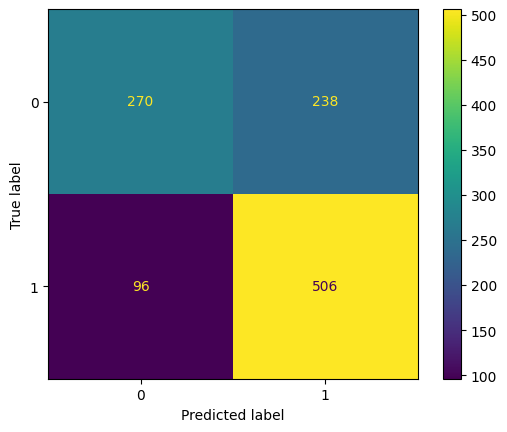

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

cm=confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [33]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-Validation Accuracy Scores:", cross_val_scores)
print("Mean CV Accuracy:", np.mean(cross_val_scores))

Cross-Validation Accuracy Scores: [0.62400636 0.63434022 0.62241653 0.60143198 0.62291169]
Mean CV Accuracy: 0.621021358294979


We can see that using feature selection to add the rolling averages has yielded us even better accuracy scores.

Text(0.5, 1.0, 'Actual VS. Predicted Values')

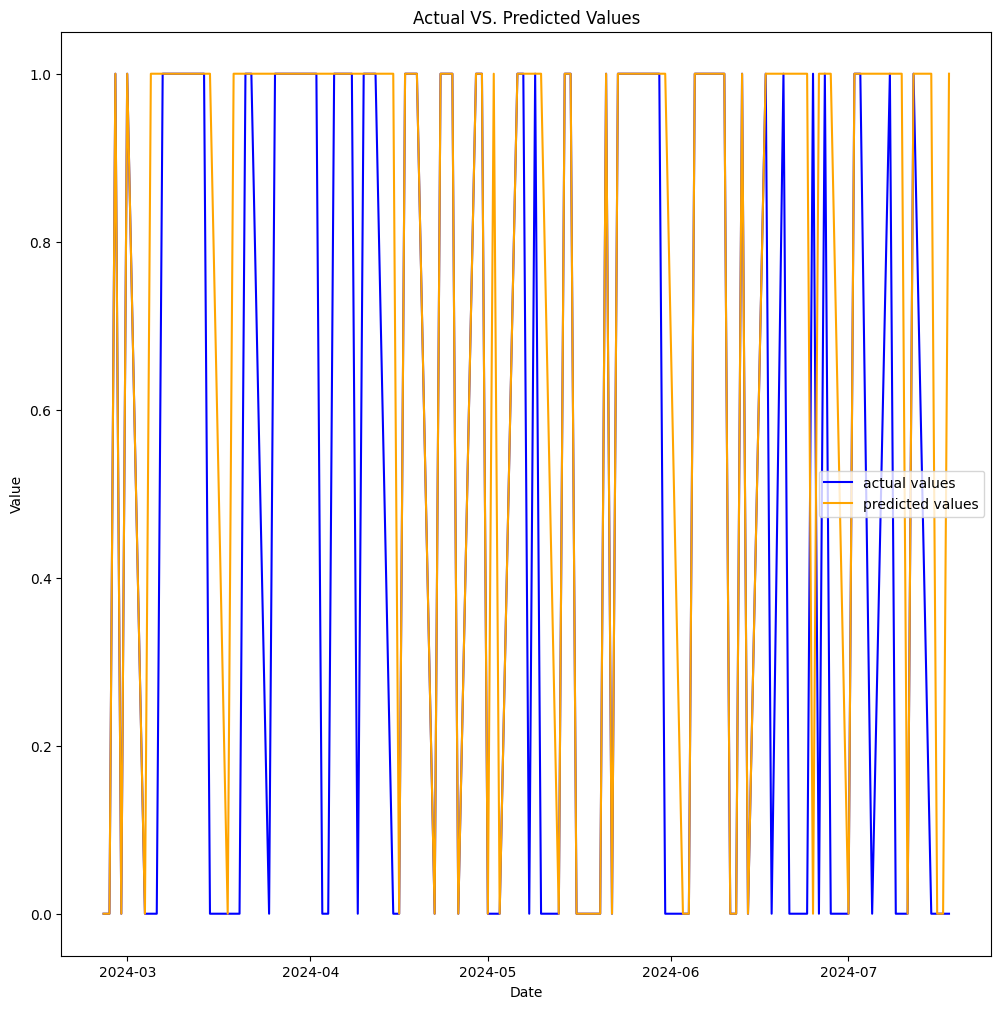

In [34]:
fig, ax = plt.subplots(figsize = (12, 12))

ax.plot(sp500[-100:].index.date, y_test[-100:], color="blue", label="actual values")
ax.plot(sp500[-100:].index.date, predictions[-100:], color="orange", label="predicted values")
ax.legend()

ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.set_title("Actual VS. Predicted Values")

In [35]:
preds = pd.Series(predictions)

preds.value_counts()

1    744
0    366
Name: count, dtype: int64

In [36]:
test = pd.Series(y_test)

test.value_counts()

1    602
0    508
Name: count, dtype: int64

One last check for overfitting

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test, predictions, average=None))
print(recall_score(y_test, predictions, average=None))
print(f1_score(y_test, predictions))

[0.73770492 0.68010753]
[0.53149606 0.84053156]
0.7518573551263001


These results indicate little to no signs of overfitting, however, we do notice that the recall score for class 0 is much lower than the recall score of class 1: [0.49375   0.8974359]. This is typically due to the data having a general upward trend, therefore having more days where the price has increased.


# **Now we try a stronger approach using deep learning**

In [38]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_train.shape

(6288, 11, 1)

Here we will use an advanced technique which sets a learning rate which decreases with each epoch, yielding the best results.

In [39]:
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from tensorflow.keras.optimizers import Adam
# Number of epochs
num_epochs = 100

# Number of training steps per epoch
steps_per_epoch = len(X_train) // 32  # Assuming a batch size of 128

# Total number of training steps
num_train_steps = steps_per_epoch * num_epochs

# Learning rate scheduler
lr_scheduler = PolynomialDecay(
    initial_learning_rate=3e-3, end_learning_rate=0.0, decay_steps=num_train_steps
)

opt = Adam(learning_rate=lr_scheduler)

In [40]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model = Sequential()

# First LSTM layer
model.add(LSTM(units=35, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Second LSTM layer
model.add(LSTM(units=30, return_sequences=False))

# Add a Dense layer with ReLU activation
model.add(Dense(units=20, activation='relu'))

# Output layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 11, 35)            5180      
                                                                 
 lstm_1 (LSTM)               (None, 30)                7920      
                                                                 
 dense (Dense)               (None, 20)                620       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 13741 (53.68 KB)
Trainable params: 13741 (53.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.15)

Epoch 1/100
167/167 [==============================] - 10s 14ms/step - loss: 0.6908 - accuracy: 0.5356 - val_loss: 0.6860 - val_accuracy: 0.5424
Epoch 2/100
167/167 [==============================] - 1s 6ms/step - loss: 0.6674 - accuracy: 0.5969 - val_loss: 0.6481 - val_accuracy: 0.6017
Epoch 3/100
167/167 [==============================] - 1s 7ms/step - loss: 0.6555 - accuracy: 0.6061 - val_loss: 0.6407 - val_accuracy: 0.6123
Epoch 4/100
167/167 [==============================] - 1s 7ms/step - loss: 0.6522 - accuracy: 0.6155 - val_loss: 0.6388 - val_accuracy: 0.6271
Epoch 5/100
167/167 [==============================] - 1s 7ms/step - loss: 0.6520 - accuracy: 0.6147 - val_loss: 0.6449 - val_accuracy: 0.6165
Epoch 6/100
167/167 [==============================] - 1s 7ms/step - loss: 0.6494 - accuracy: 0.6160 - val_loss: 0.6442 - val_accuracy: 0.6176
Epoch 7/100
167/167 [==============================] - 1s 7ms/step - loss: 0.6479 - accuracy: 0.6211 - val_loss: 0.6410 - val_accuracy: 0.61

In [44]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_test.shape

(1110, 11, 1)

In [45]:
predictions = model.predict(X_test)

predictions

35/35 [==============================] - 0s 3ms/step


array([[0.20595077],
       [0.55320174],
       [0.16989037],
       ...,
       [0.0978682 ],
       [0.46298948],
       [0.3838314 ]], dtype=float32)

Interestingly, we can see that the predictions done by the deep learning model are not a firm 0 or 1. They come as the possibility of the value being a 1. We can set a threshold to decide which values should be considered 1, but before that, we visualize.

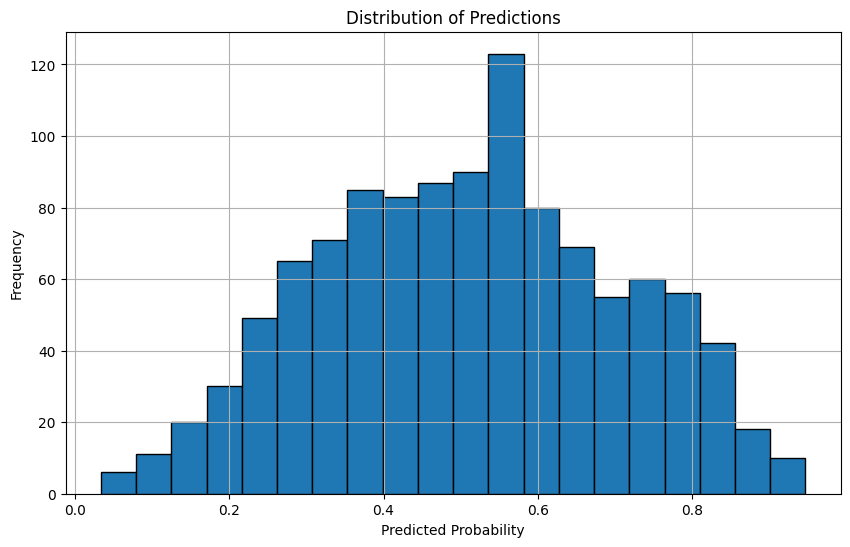

In [46]:
import matplotlib.pyplot as plt

# Assuming 'predictions' is the array of predictions
plt.figure(figsize=(10, 6))
plt.hist(predictions, bins=20, edgecolor='black')
plt.title('Distribution of Predictions')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Looking at the data, we can see that the middle point where the data is distributed evenly is around 0.5-0.55, therefore, we will set the threshold to be the middlepoint, 0.525.

In [47]:
threshold = 0.525
predictions = (predictions > threshold).astype(int)

predictions

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [48]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(f1_score(y_test, predictions))

[[342 166]
 [238 364]]
0.6360360360360361
0.6431095406360423


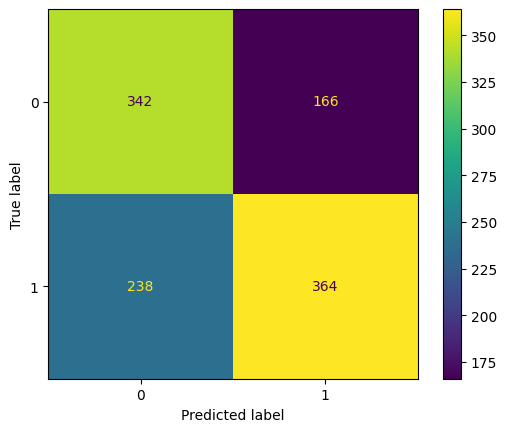

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

cm=confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test, predictions, average=None))
print(recall_score(y_test, predictions, average=None))
print(f1_score(y_test, predictions))

[0.58965517 0.68679245]
[0.67322835 0.60465116]
0.6431095406360423


We can see from the confusion matrix and precision score that the model is predicting both 0 and 1 more correctly than it is not. This is an improvement from previous models which predicted mostly the label 1 correctly but not the label 0.

Text(0.5, 1.0, 'Actual VS. Predicted Values')

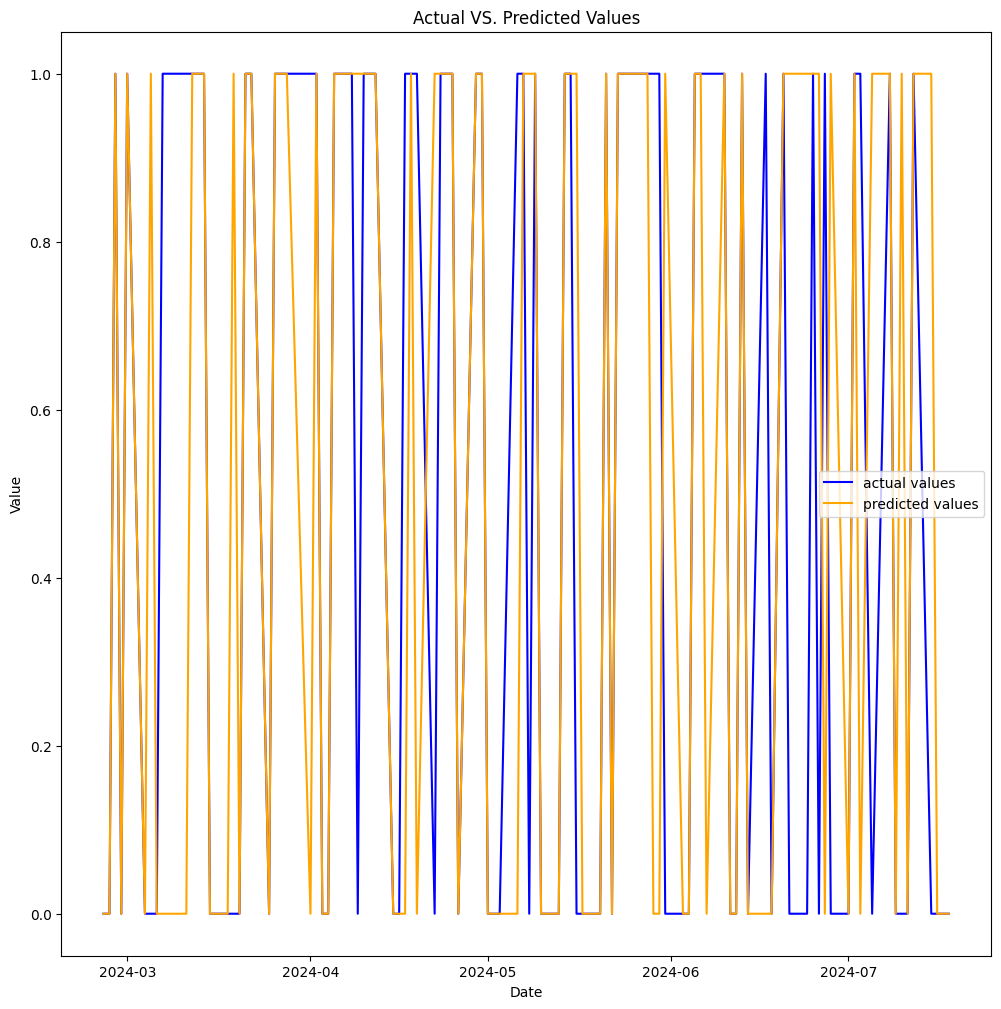

In [51]:
fig, ax = plt.subplots(figsize = (12, 12))

ax.plot(sp500[-100:].index.date, y_test[-100:], color="blue", label="actual values")
ax.plot(sp500[-100:].index.date, predictions[-100:], color="orange", label="predicted values")
ax.legend()

ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.set_title("Actual VS. Predicted Values")

We can see that the new model using neural networks has provided even better results.